In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('Plot.csv')
df

,Plot,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price')

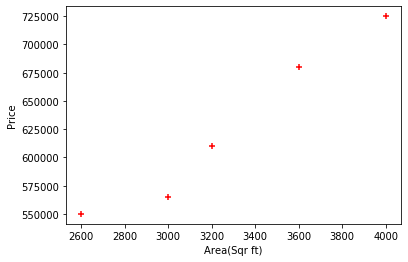

In [3]:
#%matplotlib inline
plt.scatter(df.Plot, df.Price, color='red', marker='+')
plt.xlabel('Area(Sqr ft)')
plt.ylabel('Price')

In [4]:
reg=linear_model.LinearRegression()
reg.fit(df[['Plot']], df.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
reg.predict([[5000]])

array([859554.79452055])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
180616.43835616432+(135.78767123*5000)

859554.7945061643

In [9]:
d=pd.read_csv('predicated_data.csv')
d

,Area
0,1209
1,2347
2,5600
3,10
4,8988
5,6683
6,4500
7,8000
8,7500
9,5431


In [10]:
p = reg.predict(d)

In [11]:
d['prices'] = p
d

,Area,prices
0,1209,3.447837e+05
1,2347,4.993101e+05
2,5600,9.410274e+05
3,10,1.819743e+05
4,8988,1.401076e+06
5,6683,1.088085e+06
6,4500,7.916610e+05
7,8000,1.266918e+06
8,7500,1.199024e+06
9,5431,9.180793e+05


In [12]:
d.to_csv('predicated_data1.csv')

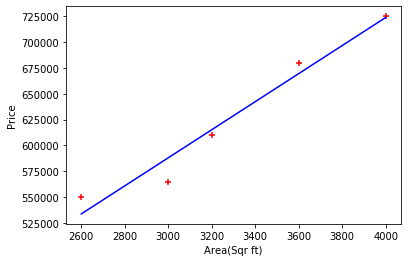

In [13]:
plt.scatter(df.Plot, df.Price, color='red', marker='+')
plt.xlabel('Area(Sqr ft)')
plt.ylabel('Price')
plt.plot(df.Plot, reg.predict(df[['Plot']]), color='blue')

In [14]:
import pickle

In [15]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg, f)

In [17]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [23]:
mp.predict([[1500]])

array([384297.94520548])

In [25]:
from sklearn.externals import joblib

In [26]:
joblib.dump(reg, 'model_joblib')

['model_joblib']

In [27]:
mj = joblib.load('model_joblib')

In [29]:
mj.predict([[5000]])

array([859554.79452055])